# Analysis of the lever position memory task

The first pilot experiment is performed by Moritz and Maryam.

Four mice were trained on the autopi task as usual. The main difference is that the lever in darkness is located at the same position as it was on the previous light trial. On 1/4 dark trials, the lever position changes.

We want to see if mice choose to search where the lever should be according to the training rule.
We can compare search path for normal dark trials and that of probe dark trials

## Create a project object with a list of session

In [1]:
import os
os.environ["DLClight"]="True" # if you don't need dlb gui
import numpy as np
import pandas as pd
import os.path
import autopipy
import importlib
import pickle
from autopipy.project import Project
from autopipy.video_utilities import positionTrackingFromArenaTopVideo
import matplotlib.pyplot as plt

/home/moritz/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/moritz/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/moritz/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/moritz/anaconda3/envs/DLC-GPU/lib/pyt

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [2]:
projectName="autopi_behavior_2021"
#projectName="memory_sessions_complete_list"
dataPath="/adata/projects/autopi_behavior_2021"
dlcModelPath="/adata/models"
bridgeModel1 ="bridgeDetection_640_480-Allen-2021-02-10"
mouseLeverModel ="arena_top-Allen-2019-10-30"
bridgeModel2 = "bridgeDetection_480_480-Allen-2021-01-23"
arenaMinRadius= 190
arenaMaxRadius= 230
myProject = Project(name=projectName,dataPath=dataPath,dlcModelPath=dlcModelPath)

Project name: autopi_behavior_2021
dataPath: /adata/projects/autopi_behavior_2021
dlcModelPath: /adata/models


Create a list of sessions with this protocol. 

The list is loaded from a file in our project directory.

To add sessions, just add them to this file

In [3]:
fn=myProject.dataPath+"/memory_sessions_complete_list"
print("Reading " + fn)
sessionNamesTesting = pd.read_csv(fn) # this will be a pandas dataframe

# create a list of session object in the project object
myProject.createSessionList(sessionNameList=sessionNamesTesting.sessionName.to_list())
print("We have {} recording sessions".format(len(myProject.sessionList)))
sessionNamesTesting

Reading /adata/projects/autopi_behavior_2021/memory_sessions_complete_list
We have 50 recording sessions


,sessionName
0,mn9686-26052021-1414
1,mn9686-25052021-1448
2,TYY5622-26052021-1531
3,TYY5622-25052021-1554
4,TYY9524-26052021-1748
5,TYY9524-25052021-1804
6,TYY5630-26052021-1641
7,TYY5630-25052021-1700
8,mn9686-14052021-1501
9,mn9686-16052021-1443


## Check if all the files needed in the testing session directories are there

The `session` objects have a method call `checkSessionDirectory`. 

If a file is missing, the function will raise an exception. Fix the problem manually and repeat until you don't have any exceptions.

In [4]:
for ses in myProject.sessionList :
    ses.checkSessionDirectory()
    ses.testVideoLogSynchronization()

mn9686-26052021-1414, video len: 109156, video-log:0, first frame: 0, max log gap: nan, mean time diff: 0.0335, max time diff: 0.163, num problem diff: 0, frame rate: 29.8
mn9686-25052021-1448, video len: 116184, video-log:0, first frame: 0, max log gap: nan, mean time diff: 0.0335, max time diff: 1.46, num problem diff: 3, frame rate: 29.8
TYY5622-26052021-1531, video len: 114139, video-log:0, first frame: 0, max log gap: nan, mean time diff: 0.0337, max time diff: 4.32, num problem diff: 29, frame rate: 29.7
TYY5622-25052021-1554, video len: 113897, video-log:0, first frame: 0, max log gap: nan, mean time diff: 0.0336, max time diff: 2.89, num problem diff: 11, frame rate: 29.8
TYY9524-26052021-1748, video len: 111293, video-log:0, first frame: 0, max log gap: nan, mean time diff: 0.0337, max time diff: 2.24, num problem diff: 20, frame rate: 29.7
TYY9524-25052021-1804, video len: 111015, video-log:0, first frame: 0, max log gap: nan, mean time diff: 0.0337, max time diff: 1.4, num p

## Extract the animal position using deeplabcut

We need to run deeplabcut on the arena video. You need to run this on a computer with a good GPU (e.g. a230-pc73).
This takes approximately 25 minutes per session.

Only run it on the sessions that you need.

To run it on a single session.

In [7]:
from autopipy.video_utilities import positionTrackingFromArenaTopVideo
from autopipy.dlcObjectDetecto
+
rs import MouseLeverDetector
ses = myProject.sessionList[-1]
positionTrackingFromArenaTopVideo(ses,modelDir=dlcModelPath)

Startint at 17:20:08
labelImage: /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625/arenaDetection.png
/tmp/tmpVid.avi created for bridge detection
Running dlc.analyze_video on /tmp/tmpVid.avi
Using snapshot-460000 for model /adata/models/bridgeDetection_640_480-Allen-2021-02-10/dlc-models/iteration-0/bridgeDetection_640_480Feb10-trainset95shuffle1
Initializing ResNet


  0%|          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  /tmp/tmpVid.avi
/tmp  already exists!
Loading  /tmp/tmpVid.avi
Duration of video [s]:  16.67 , recorded with  30.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


510it [03:29,  2.43it/s]                         


Saving results in /tmp...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
Saving position data to /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.csv
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
Bridge coordinates: [[329   0]
 [329  29]
 [377  29]
 [377   0]]
labelImage: /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625/bridgeDetection.png
Time elapsed 0:03:42.092096
Cropping and masking 107793 frames in /adata/pr

  0%|          | 0/107793 [00:00<?, ?it/s]

Starting to analyze %  /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625/TYY9524-03062021-1625.arena_top.cropped.avi
/adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625  already exists!
Loading  /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625/TYY9524-03062021-1625.arena_top.cropped.avi
Duration of video [s]:  3593.1 , recorded with  30.0 fps!
Overall # of frames:  107793  found with (before cropping) frame dimensions:  480 480
Starting to extract posture


108777it [9:15:07,  3.27it/s]                             


Saving results in /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625/TYY9524-03062021-1625.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.h5
dlc.loadPositionData() read data from /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625/TYY9524-03062021-1625.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.h5
Saving position data to /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625/TYY9524-03062021-1625.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.csv
dlc.loadPositionData() read data from /adata

  0%|          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  /tmp/tmpVid.avi
/tmp  already exists!
Loading  /tmp/tmpVid.avi
Duration of video [s]:  16.67 , recorded with  30.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  480 480
Starting to extract posture


510it [02:35,  3.29it/s]                         

Saving results in /tmp...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.h5
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.h5
Saving position data to /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.csv
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.h5
Bridge coordinates: [[218   0]
 [218  35]
 [265  35]
 [265   0]]
labelImage: /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-03062021-1625/bridgeDetectionCropped.png
labelImage: /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-030

# To run it on a group of sessions

In [5]:
myProject.sessionList

In [6]:
for i,ses in enumerate(myProject.sessionList[44:]) :
    print("****** Session number ",i," ****** ",ses.name)
    positionTrackingFromArenaTopVideo(ses=ses,modelDir=myProject.dlcModelPath)

****** Session number  0  ******  TYY9524-02062021-1642
Startint at 13:26:46
labelImage: /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642/arenaDetection.png
/tmp/tmpVid.avi created for bridge detection
Running dlc.analyze_video on /tmp/tmpVid.avi
Using snapshot-460000 for model /adata/models/bridgeDetection_640_480-Allen-2021-02-10/dlc-models/iteration-0/bridgeDetection_640_480Feb10-trainset95shuffle1
Initializing ResNet


  0%|          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  /tmp/tmpVid.avi
/tmp  already exists!
Loading  /tmp/tmpVid.avi
Duration of video [s]:  16.67 , recorded with  30.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


510it [03:39,  2.32it/s]                         


Saving results in /tmp...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
Saving position data to /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.csv
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
Bridge coordinates: [[328   0]
 [328  29]
 [377  29]
 [377   0]]
labelImage: /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642/bridgeDetection.png
Time elapsed 0:03:59.038299
Cropping and masking 108755 frames in /adata/pr

  0%|          | 0/108755 [00:00<?, ?it/s]

Starting to analyze %  /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642/TYY9524-02062021-1642.arena_top.cropped.avi
/adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642  already exists!
Loading  /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642/TYY9524-02062021-1642.arena_top.cropped.avi
Duration of video [s]:  3625.17 , recorded with  30.0 fps!
Overall # of frames:  108755  found with (before cropping) frame dimensions:  480 480
Starting to extract posture


109787it [9:39:46,  3.16it/s]                             


Saving results in /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642/TYY9524-02062021-1642.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.h5
dlc.loadPositionData() read data from /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642/TYY9524-02062021-1642.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.h5
Saving position data to /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642/TYY9524-02062021-1642.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.csv
dlc.loadPositionData() read data from /adata

  0%|          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  /tmp/tmpVid.avi
/tmp  already exists!
Loading  /tmp/tmpVid.avi
Duration of video [s]:  16.67 , recorded with  30.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  480 480
Starting to extract posture


510it [02:35,  3.27it/s]                         


Saving results in /tmp...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.h5
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.h5
Saving position data to /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.csv
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.h5
Bridge coordinates: [[218   0]
 [218  35]
 [265  35]
 [265   0]]
labelImage: /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-02062021-1642/bridgeDetectionCropped.png
labelImage: /adata/projects/autopi_behavior_2021/TYY9524/TYY9524-020

  0%|          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  /tmp/tmpVid.avi
/tmp  already exists!
Loading  /tmp/tmpVid.avi
Duration of video [s]:  16.67 , recorded with  30.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


510it [03:28,  2.44it/s]                         

Saving results in /tmp...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
Saving position data to /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.csv
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
Bridge coordinates: [[329   0]
 [329  29]
 [377  29]
 [377   0]]
labelImage: /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/bridgeDetection.png
Time elapsed 0:03:47.415287
Cropping and masking 109440 frames in /adata/proj

109430 of 109440 frames
Exiting. Video saved as /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/mn9686-03062021-1302.arena_top.cropped.avi
Time elapsed 0:13:35.258919
Removing previous inference data: /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/mn9686-03062021-1302.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.h5
Running dlc.analyze_video on /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/mn9686-03062021-1302.arena_top.cropped.avi
Using snapshot-950000 for model /adata/models/arena_top-Allen-2019-10-30/dlc-models/iteration-0/arena_topOct30-trainset90shuffle1
Initializing ResNet


  0%|          | 0/109440 [00:00<?, ?it/s]

Starting to analyze %  /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/mn9686-03062021-1302.arena_top.cropped.avi
/adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302  already exists!
Loading  /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/mn9686-03062021-1302.arena_top.cropped.avi
Duration of video [s]:  3648.0 , recorded with  30.0 fps!
Overall # of frames:  109440  found with (before cropping) frame dimensions:  480 480
Starting to extract posture


110494it [9:26:41,  3.25it/s]                             


Saving results in /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/mn9686-03062021-1302.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.h5
dlc.loadPositionData() read data from /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/mn9686-03062021-1302.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.h5
Saving position data to /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/mn9686-03062021-1302.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.csv
dlc.loadPositionData() read data from /adata/projects/a

  0%|          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  /tmp/tmpVid.avi
/tmp  already exists!
Loading  /tmp/tmpVid.avi
Duration of video [s]:  16.67 , recorded with  30.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  480 480
Starting to extract posture


510it [02:35,  3.29it/s]                         


Saving results in /tmp...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.h5
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.h5
Saving position data to /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.csv
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_480_480Jan23shuffle1_320000.h5
Bridge coordinates: [[218   0]
 [218  34]
 [265  34]
 [265   0]]
labelImage: /adata/projects/autopi_behavior_2021/mn9686/mn9686-03062021-1302/bridgeDetectionCropped.png
labelImage: /adata/projects/autopi_behavior_2021/mn9686/mn9686-0306202

  0%|          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  /tmp/tmpVid.avi
/tmp  already exists!
Loading  /tmp/tmpVid.avi
Duration of video [s]:  16.67 , recorded with  30.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


510it [03:28,  2.45it/s]                         

Saving results in /tmp...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
Saving position data to /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.csv
dlc.loadPositionData() read data from /tmp/tmpVidDLC_resnet_50_bridgeDetection_640_480Feb10shuffle1_460000.h5
Bridge coordinates: [[329   0]
 [329  29]
 [377  29]
 [377   0]]
labelImage: /adata/projects/autopi_behavior_2021/mn9686/mn9686-04062021-1317/bridgeDetection.png
Time elapsed 0:03:47.203247
Cropping and masking 109558 frames in /adata/proj

109550 of 109558 frames
Exiting. Video saved as /adata/projects/autopi_behavior_2021/mn9686/mn9686-04062021-1317/mn9686-04062021-1317.arena_top.cropped.avi
Time elapsed 0:13:36.814334
Removing previous inference data: /adata/projects/autopi_behavior_2021/mn9686/mn9686-04062021-1317/mn9686-04062021-1317.arena_top.croppedDLC_resnet_50_arena_topOct30shuffle1_950000.h5
Running dlc.analyze_video on /adata/projects/autopi_behavior_2021/mn9686/mn9686-04062021-1317/mn9686-04062021-1317.arena_top.cropped.avi
Using snapshot-950000 for model /adata/models/arena_top-Allen-2019-10-30/dlc-models/iteration-0/arena_topOct30-trainset90shuffle1
Initializing ResNet


  0%|          | 0/109558 [00:00<?, ?it/s]

Starting to analyze %  /adata/projects/autopi_behavior_2021/mn9686/mn9686-04062021-1317/mn9686-04062021-1317.arena_top.cropped.avi
/adata/projects/autopi_behavior_2021/mn9686/mn9686-04062021-1317  already exists!
Loading  /adata/projects/autopi_behavior_2021/mn9686/mn9686-04062021-1317/mn9686-04062021-1317.arena_top.cropped.avi
Duration of video [s]:  3651.93 , recorded with  30.0 fps!
Overall # of frames:  109558  found with (before cropping) frame dimensions:  480 480
Starting to extract posture


 67%|██████▋   | 73365/109558 [6:13:42<3:07:36,  3.22it/s]

The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


 67%|██████▋   | 73365/109558 [6:14:48<3:04:53,  3.26it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/moritz/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-bb65544ddfdd>", line 3, in <module>
    positionTrackingFromArenaTopVideo(ses=ses,modelDir=myProject.dlcModelPath)
  File "/home/moritz/repo/autopipy/autopipy/video_utilities.py", line 253, in positionTrackingFromArenaTopVideo
    mouseLeverD.inferenceVideo(pathVideoFile=croppedVideoFile,overwrite=True)
  File "/home/moritz/repo/autopipy/autopipy/dlc.py", line 72, in inferenceVideo
    self.loadPositionData(pathVideoFile)
  File "/home/moritz/repo/autopipy/autopipy/dlc.py", line 115, in loadPositionData
    self.pathVideoOutputH5=self.getVideoOutputH5(pathVideoFile)
  File "/home/moritz/repo/autopipy/autopipy/dlc.py", line 167, in getVideoOutputH5
    cfg, shuffle, trainFraction, modelprefix=modelprefix)
  File "/home/moritz/anaconda3/envs/DLC-GP

TypeError: object of type 'NoneType' has no len()


## Trial segmentation and trial feature extraction


The `session` object first get trial times from the `log` file present in each session directory.
Then a list of `trial` objects are created. The trial object are extracting most of the features of the trial, using `Journeys` and `NavPath` objects when needed.

Each `trial` returns a pandas DataFrame. These are concatenated by the `session` object. Finally, the `project` object concatenate the `session` DataFrames into a single DataFrame for the project.

We will save the results in a file so that we don't need to run this step all the time.

Run a test on one session

In [ ]:
ses = myProject.sessionList[20]
ses.extractTrialFeatures()
ses.getTrialVariablesDataFrame()

In [ ]:
count = 0
for ses in myProject.sessionList:
    print("Session {}".format(count))
    ses.extractTrialFeatures() # extract every trial
    ses.getTrialVariablesDataFrame() # df is stored in the session object
    count=count+1

In [8]:
trialsDF = myProject.getTrialVariables()
# save the DataFram as csv file
fn = myProject.dataPath+"/results/memoryTrialsDF.csv"
trialsDF.to_csv(fn)

In [9]:
# save the project object, with the already analyzed sessions!
fn = myProject.dataPath+"/results/myMemoryProject.pkl"
pickle.dump(myProject,open(fn,"wb"))

## Compare search path of dark trials for normal and probe trials

For each dark trial, we need to have the lever position for the previous trial. 

First we reload the saved data from file, so we don't have to re-run the trial extraction each time.

In [10]:
fn =  myProject.dataPath+"/results/memoryTrialsDF.csv"
df = pd.read_csv(fn)

df is a pandas data.frame with one trial per row. 

We need to group the trials in session, calculate the previous lever position for each trial, and the merge the results

We will first write a function that works on the trials from a single session, and then apply it to all session

In [11]:
# get the data from a single session
ses = df[df.sessionName=="TYY5622-16052021-1621"]
print(ses[["leverPositionX","leverPositionY"]])
# get the previous x and y position
prevLeverPositionX = pd.concat([pd.Series([np.nan]), ses.leverPositionX[:-1]],ignore_index=True)
prevLeverPositionY = pd.concat([pd.Series([np.nan]), ses.leverPositionY[:-1]],ignore_index=True)

# create new columns with the previous position
ses["prevLeverPositionX"] = prevLeverPositionX.values
ses["prevLeverPositionY"] = prevLeverPositionY.values

# check the results
print(ses.loc[:,ses.columns.to_series().str.contains('everPosition')])

      leverPositionX  leverPositionY
1133        8.215386        7.620694
1134        0.139800        2.041074
1135       11.098027       26.538217
1136        9.934468      -19.220262
1137        3.141052        1.350111
1138      -24.258123       -2.203340
1139       -3.679771       -2.474084
1140       -4.773328       -3.949869
1141       14.228651       13.063996
1142       16.437435       12.152941
1143       11.721750        4.425914
1144       10.998264        4.996861
1145       15.135441       19.995317
1146      -14.759131      -17.819850
1147        2.865805       -2.479978
1148        2.848978       -0.523353
1149        1.001197        2.883975
1150        0.517863        3.074558
1151      -11.653826       10.304435
1152      -11.309488        8.680676
1153      -13.868097      -19.331877
1154       14.455911       19.843351
1155        2.662633       -1.369227
1156        2.187828       -2.361979
1157       14.113733        2.586852
1158       14.866332        0.947063
1

In [12]:
# this is our function to do the same job
ses = df[df.sessionName=="TYY5622-16052021-1621"]
print(ses.loc[:,ses.columns.to_series().str.contains('everPosition')])

      leverPositionX  leverPositionY  leverPositionOri
1133        8.215386        7.620694         36.122476
1134        0.139800        2.041074        330.521488
1135       11.098027       26.538217          8.200261
1136        9.934468      -19.220262         19.628422
1137        3.141052        1.350111        105.521048
1138      -24.258123       -2.203340         29.515068
1139       -3.679771       -2.474084        305.830018
1140       -4.773328       -3.949869        300.249658
1141       14.228651       13.063996         44.881099
1142       16.437435       12.152941         51.039896
1143       11.721750        4.425914        195.843956
1144       10.998264        4.996861        195.743270
1145       15.135441       19.995317        130.305448
1146      -14.759131      -17.819850        124.484875
1147        2.865805       -2.479978        327.238628
1148        2.848978       -0.523353        330.055828
1149        1.001197        2.883975         54.886877
1150      

In [13]:
ses = df[df.sessionName=="TYY5622-16052021-1621"]
print(ses.loc[:,ses.columns.to_series().str.contains('everPosition')])

def addPrevLeverPosition(ses):
    # get the previous x and y position
    prevLeverPositionX = pd.concat([pd.Series([np.nan]), ses.leverPositionX[:-1]],ignore_index=True)
    prevLeverPositionY = pd.concat([pd.Series([np.nan]), ses.leverPositionY[:-1]],ignore_index=True)
    # create new columns with the previous position
    ses["prevLeverPositionX"] = prevLeverPositionX.values
    ses["prevLeverPositionY"] = prevLeverPositionY.values
    # calculate the distance of lever positions
    ses["leverDelta"] = np.sqrt((ses["leverPositionX"]-ses["prevLeverPositionX"])**2 + (ses["leverPositionY"]-ses["prevLeverPositionY"])**2)
    return ses
# run it on one session
addPrevLeverPosition(ses)

# apply our function to all sessions
df = df.groupby("sessionName").apply(addPrevLeverPosition)

print(df.loc[:5,df.columns.to_series().str.contains('everPosition')])

      leverPositionX  leverPositionY  leverPositionOri
1133        8.215386        7.620694         36.122476
1134        0.139800        2.041074        330.521488
1135       11.098027       26.538217          8.200261
1136        9.934468      -19.220262         19.628422
1137        3.141052        1.350111        105.521048
1138      -24.258123       -2.203340         29.515068
1139       -3.679771       -2.474084        305.830018
1140       -4.773328       -3.949869        300.249658
1141       14.228651       13.063996         44.881099
1142       16.437435       12.152941         51.039896
1143       11.721750        4.425914        195.843956
1144       10.998264        4.996861        195.743270
1145       15.135441       19.995317        130.305448
1146      -14.759131      -17.819850        124.484875
1147        2.865805       -2.479978        327.238628
1148        2.848978       -0.523353        330.055828
1149        1.001197        2.883975         54.886877
1150      

Calculate the distance between the previous lever and the current lever

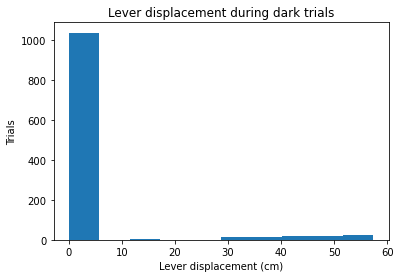

In [14]:
%matplotlib inline
plt.hist(df[df.light=="dark"]["leverDelta"].values)
plt.title("Lever displacement during dark trials")
plt.xlabel("Lever displacement (cm)")
plt.ylabel("Trials")
plt.show()


In [15]:
df["probe"] = df.leverDelta > 25

In [48]:
from datetime import datetime
df.date = pd.to_datetime(df.date)
start = datetime(2021, 5, 27, 0, 0, 0, 0)
end = datetime(2021, 5, 30, 23, 0, 0, 0)
df["probe_day"]=(df.date > start) & (df.date < end)

Keep only dark trials of the probe days

In [52]:
df = df[(df.light=="dark") & (df.probe_day==True) ] 

In [61]:

print("Normal dark trials")
print(df[(df.probe==False)].searchArenaNoLever_length.describe())
print("Probe dark trials")
print(df[(df.probe==True)].searchArenaNoLever_length.describe())

Normal dark trials
count    198.000000
mean      54.559149
std       39.337136
min        8.323355
25%       27.765172
50%       40.268592
75%       68.431344
max      182.139699
Name: searchArenaNoLever_length, dtype: float64
Probe dark trials
count     64.000000
mean      65.782619
std       67.717631
min        1.772349
25%       23.169416
50%       51.323444
75%       71.443585
max      429.106775
Name: searchArenaNoLever_length, dtype: float64


270


/home/kevin/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kevin/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/kevin/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kevin/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


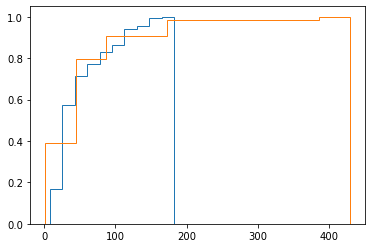

In [63]:
print(len(df))
plt.hist(df[(df.probe==False)].searchArenaNoLever_length,cumulative=True,density=True,histtype='step')
plt.hist(df[(df.probe==True)].searchArenaNoLever_length,cumulative=True,density=True,histtype='step')
plt.show()


In [66]:
from scipy import stats

valN = df[(df.probe==False)].searchArenaNoLever_length
valP = df[(df.probe==True)].searchArenaNoLever_length
stats.mannwhitneyu(x=valN, y =valP )

MannwhitneyuResult(statistic=6416.0, pvalue=0.32691667282887027)